> **Results from the best reward experiment.** \
> Comparison uses TD3, SAC, and DSAC with three different reward functions:
> 1. $r=e$
> 1. $r= e + \Delta u$
> 1. $r= e + \Delta u + u$

# ⚙️ Set-up
Loads required packages and set seaborn as plotting style

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

from helpers.paths import Path
from visualization.utils import make_smooth
sns.set()

Load and adjust data

In [2]:
# Load data
df_learn = pd.read_csv(Path.data/"best_reward_learning.csv")
df_ep = pd.read_csv(Path.data/"best_reward_episode.csv")

df_learn_s = pd.read_csv(Path.data/"best_reward_square_learning.csv")
df_ep_s = pd.read_csv(Path.data/"best_reward_square_episode.csv")

# Rename reward_type
for _df_to_replace in [df_learn, df_ep, df_learn_s, df_ep_s]:
    _df_to_replace["reward_type"].replace({
        "sq_error": r"$e$",
        "sq_error_da": r"$e+\Delta a$",
        "sq_error_da_a": r"$e+\Delta a+a$",
    }, inplace=True)

Make the data from the learning steps smooth

In [3]:
df_learn_smooth = make_smooth(df_learn, step=100, 
                              on="global_step", 
                              columns=["rollout/ep_rew_mean", "rollout/ep_len_mean"],
                              info=["algorithm", "reward_type"])

df_learn_s_smooth = make_smooth(df_learn_s, step=100, 
                              on="global_step", 
                              columns=["rollout/ep_rew_mean", "rollout/ep_len_mean"],
                              info=["algorithm", "reward_type"])

# 👨🏽‍🏫 Learning performance

## Episode length

Comapring the return from different reward functions is not informative. The return from learning is directly linked to how the reward function is designed. However, it is possible to compare the length of the episode throut the learning steps. 

The episode length in a sinusoidal tracking task are:

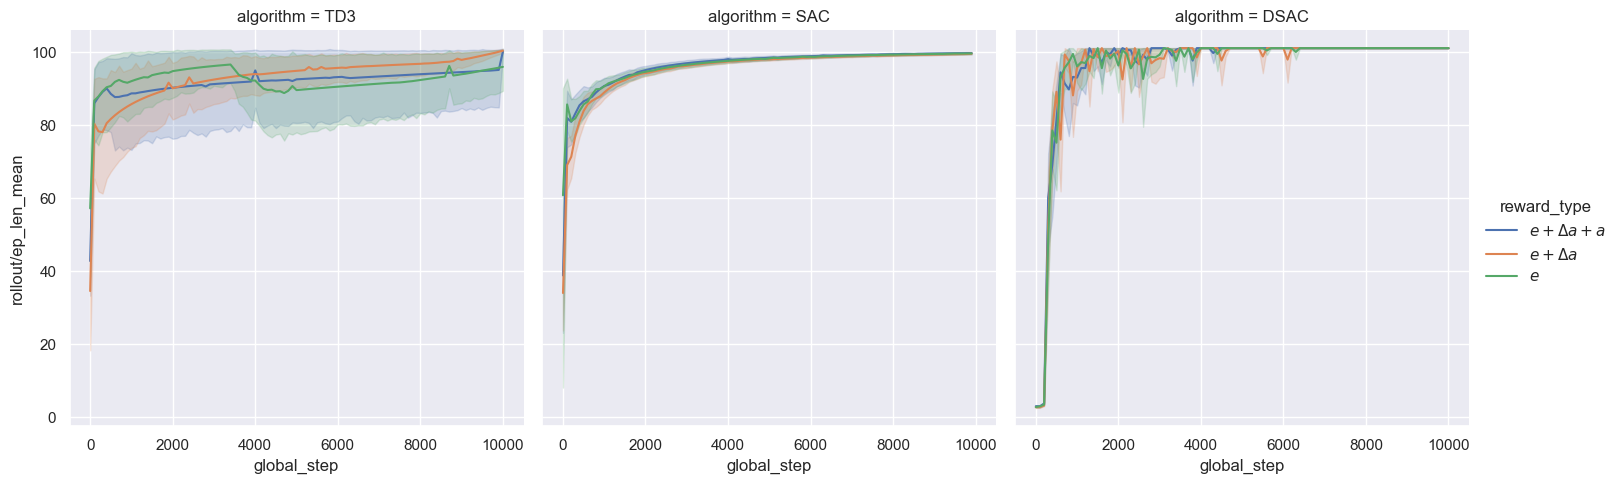

In [41]:
col_order = ["TD3", "SAC", "DSAC"]
g = sns.relplot(data=df_learn_smooth, x="global_step", y="rollout/ep_len_mean", hue="reward_type", kind="line", col="algorithm", col_order=col_order)

The episode length in a squared tracking task is:

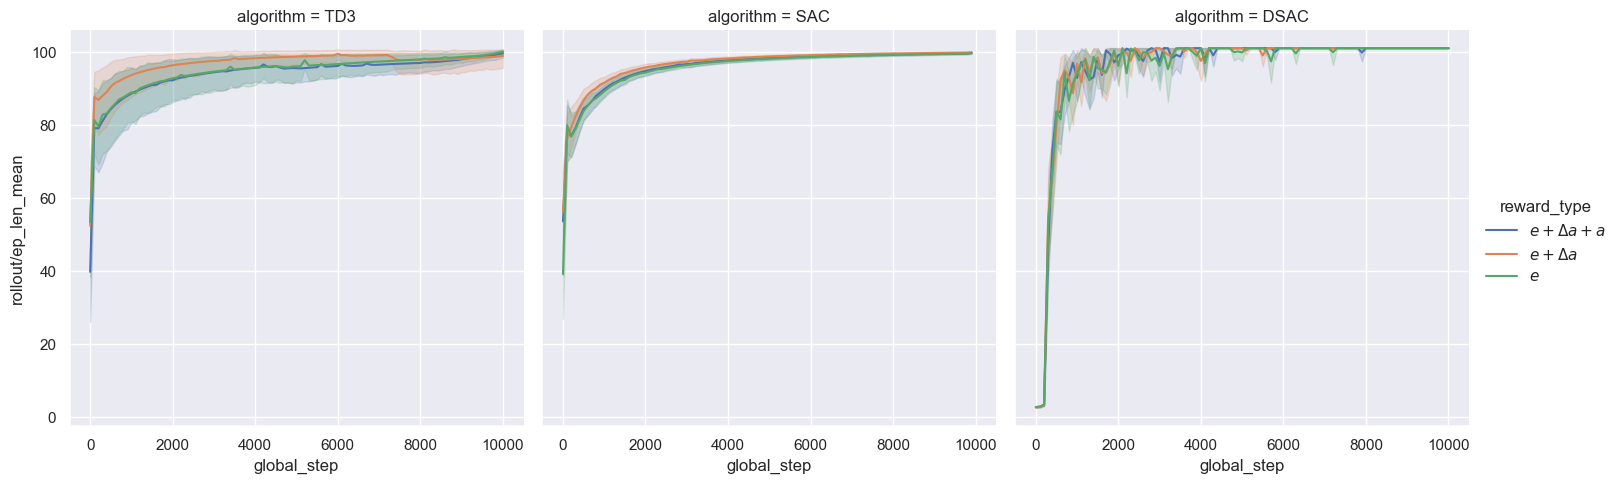

In [42]:
g = sns.relplot(data=df_learn_s_smooth, x="global_step", y="rollout/ep_len_mean", hue="reward_type", kind="line", col="algorithm", col_order=col_order)

Results show that SAC and DSAC are consistant in converging to a maximum episode length under the three types of rewards. TD3, however, shows high variance.

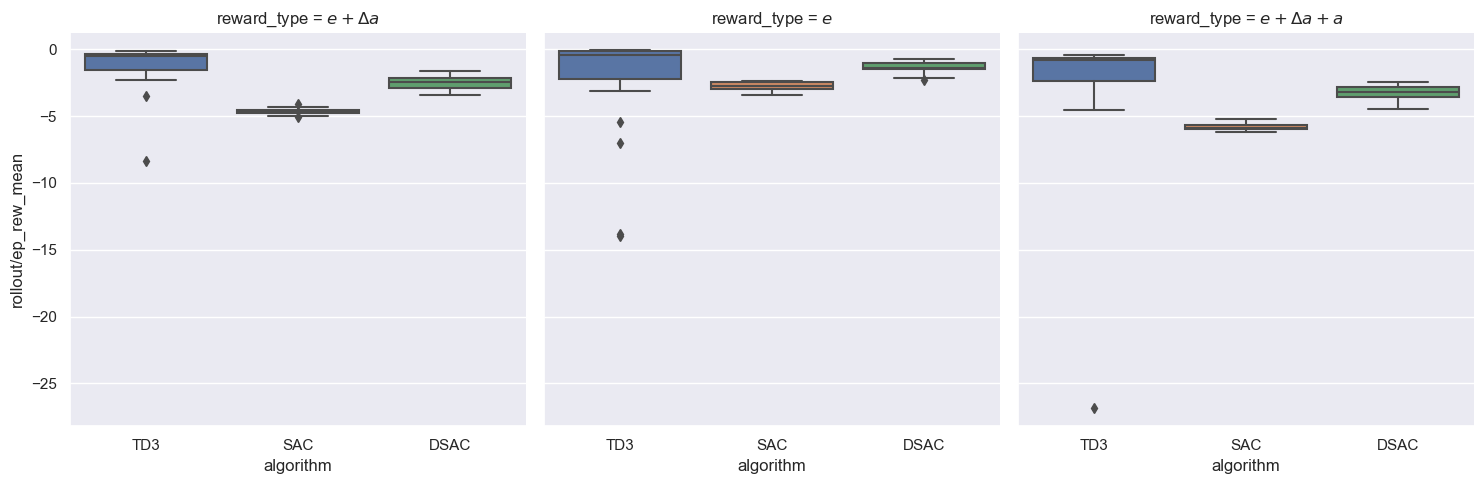

In [89]:
convergence_id = df_learn.groupby(["run"])["global_step"].idxmax().values
sns.catplot(data=df_learn.iloc[convergence_id], x="algorithm", y="rollout/ep_rew_mean", col="reward_type", kind="box", order=col_order);

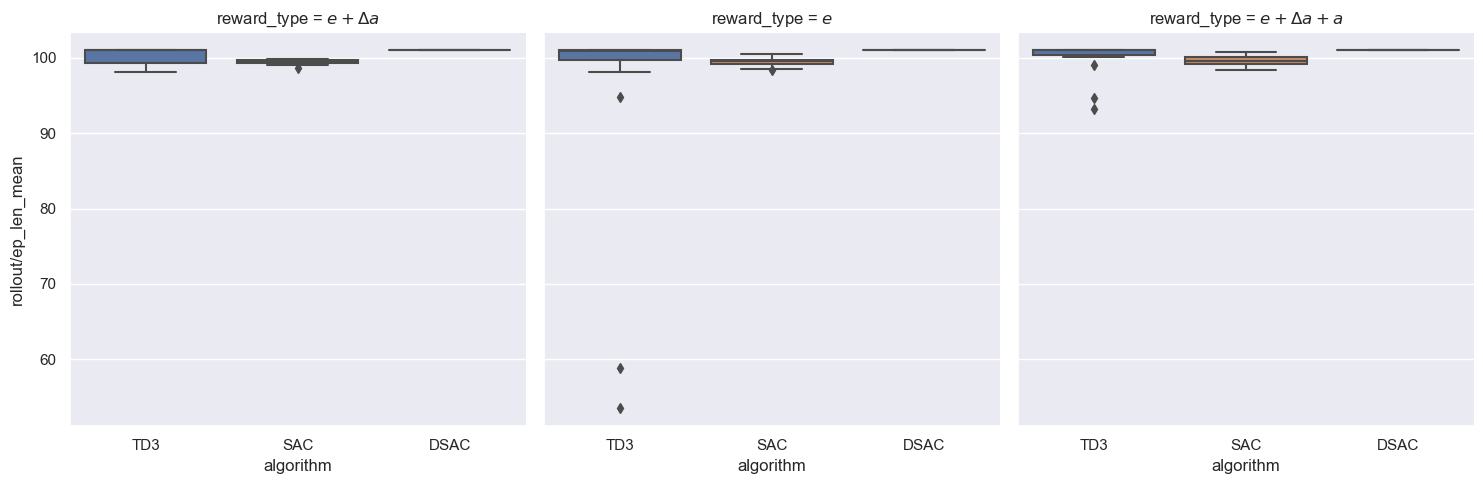

In [93]:
sns.catplot(data=df_learn.iloc[convergence_id], x="algorithm", y="rollout/ep_len_mean", col="reward_type", kind="box", order=col_order);

# 📈 Episode analysis

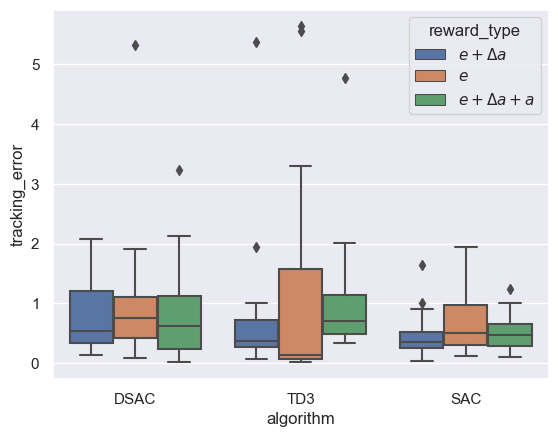

In [67]:
sns.boxplot(data=df_ep.groupby(["run", "algorithm", "reward_type"])["tracking_error"].sum().reset_index(), x="algorithm", y="tracking_error", hue="reward_type");

Two hypothesis:
- TD3 is best and worst.
- DSAC is consistently okay

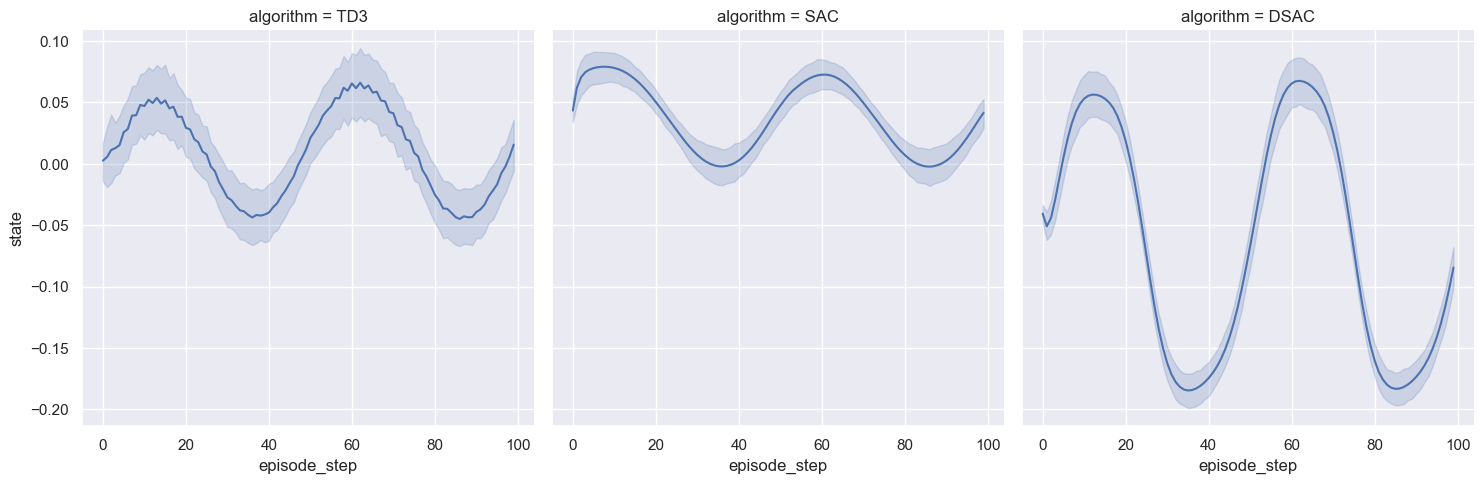

In [105]:
sns.relplot(data=df_ep, x="episode_step", y="state", col="algorithm", col_order=col_order, kind="line")

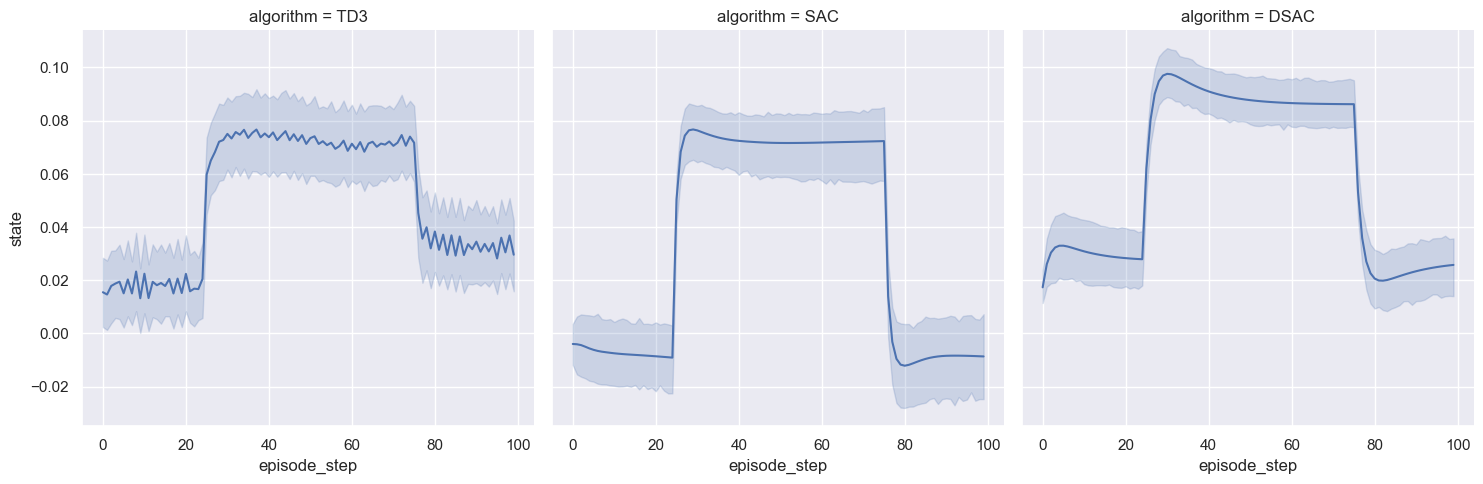

In [106]:
sns.relplot(data=df_ep_s, x="episode_step", y="state", col="algorithm", col_order=col_order, kind="line")